# Data Modeling

In [1]:
#Import some basic libraries
import numpy as np
import pandas as pd

In [3]:
#Read the data present in dataset
data = pd.read_csv('C:/Users/adity/Downloads/KNN flood prediction model/kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [5]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [6]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [7]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [8]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

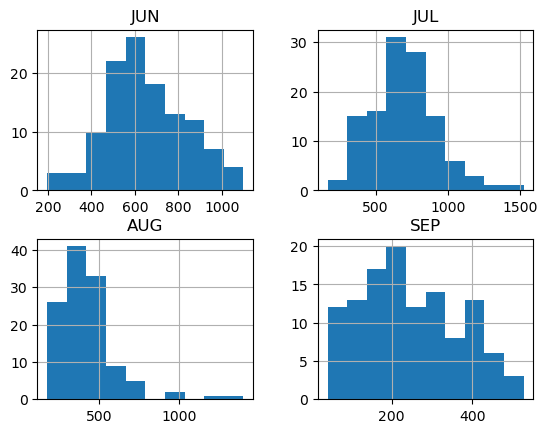

In [9]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [10]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [11]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
54,1955,4.2,6.3,28.2,125.9,544.2,782.4,392.8,236.0,438.5,378.2,178.1,19.8
92,1993,0.0,17.8,20.1,66.5,159.0,657.1,776.1,301.9,88.0,431.2,153.8,46.2
41,1942,2.4,4.7,23.2,180.3,191.9,813.6,828.8,329.3,99.8,374.4,84.7,117.9
11,1912,1.9,15.0,11.2,122.7,217.3,948.2,833.6,534.4,136.8,469.5,138.7,22.0
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [13]:
y_train.head()

54    1
92    0
41    1
11    1
4     0
Name: FLOODS, dtype: int64

# KNN Classifier

In [19]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [20]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0]


In [21]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
37     0
68     0
100    0
73     0
71     0
24     1
25     1
60     1
26     1
76     1
116    0
22     1
70     1
99     0
3      1
19     1
77     1
35     1
115    0
98     0
12     0
10     0
48     1
82     0
Name: FLOODS, dtype: int64


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [24]:
knn_accuracy.mean()

0.7083333333333334

# KNN visualization

In [26]:
import matplotlib.pyplot as plt

In [27]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [28]:
# Read the data from the dataset
data = pd.read_csv('C:/Users/adity/Downloads/KNN flood prediction model/kerala.csv')

In [29]:
# Replace the 'YES' and 'NO' in 'FLOODS' column with 1 and 0, respectively
data['FLOODS'].replace(['YES', 'NO'], [1, 0], inplace=True)

In [30]:
# Separate the features and target variable
x = data.iloc[:, 1:14]
y = data.iloc[:, -1]

In [31]:
# Scale the features between 0 and 1
minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = minmax.fit_transform(x)

In [32]:
# Divide the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [33]:
# Create and fit the KNN classifier
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train, y_train)

In [34]:
# Predict chances of flood
y_predict = knn_clf.predict(x_test)

In [35]:
# Print the predicted and actual values of floods
print('Predicted chances of flood:')
print(y_predict)
print('Actual values of floods:')
print(y_test)

Predicted chances of flood:
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1]
Actual values of floods:
52     0
17     0
80     1
101    0
87     0
76     1
89     0
62     0
68     0
103    0
95     0
2      1
91     1
9      0
49     1
16     0
110    1
1      1
3      1
81     0
58     1
43     0
4      0
74     1
Name: FLOODS, dtype: int64


In [36]:
# Calculate the accuracy using cross-validation
knn_accuracy = cross_val_score(knn_clf, x_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)
print('Mean accuracy:', knn_accuracy.mean())

Mean accuracy: 0.7083333333333334


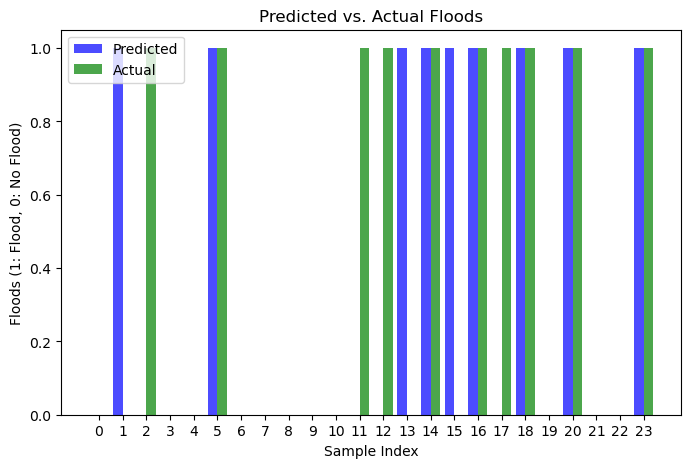

In [37]:
# Visualize the predicted and actual values using a bar plot
plt.figure(figsize=(8, 5))
plt.bar(np.arange(len(y_predict)), y_predict, width=0.4, label='Predicted', align='center', color='b', alpha=0.7)
plt.bar(np.arange(len(y_test)) + 0.4, y_test, width=0.4, label='Actual', align='center', color='g', alpha=0.7)
plt.xticks(np.arange(len(y_test)) + 0.2, np.arange(len(y_test)))
plt.xlabel('Sample Index')
plt.ylabel('Floods (1: Flood, 0: No Flood)')
plt.title('Predicted vs. Actual Floods')
plt.legend()
plt.show()

In [38]:
# Save the plot as an image (e.g., PNG format)
plt.savefig('flood_prediction_plot.png')

<Figure size 640x480 with 0 Axes>

In [39]:
# Show the plot
plt.show()